In [1]:
import sys
sys.path.insert(0, './../') 
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
from torchvision import datasets, transforms

import numpy as np
from matplotlib import pyplot as plt
import foolbox 
from foolbox import attacks as fa

# own modules
from abs_models import utils as u
# from abs_models import models as mz
# from abs_models import attack_utils as au

from abs_models.cvae import CVAE
from abs_models.cvae_abs import CVAE_ABS





device = torch.device("cuda:0")

In [2]:
net = CVAE(latent_size=8, img_size=28, num_labels=10)
model = CVAE_ABS(net, n_samples=8000, n_samples_grad=1, n_iter=50, beta=1, device=device).eval()

fmodel = foolbox.models.PyTorchModel(model,   # return logits in shape (bs, n_classes)
                                     bounds=(0., 1.), num_classes=10,
                                     device=device)

In [3]:
# test model
b, l = u.get_batch(bs=1000)  # returns random batch as np.array
pred_label = np.argmax(fmodel.batch_predictions(b), axis=1)
print('score', float(np.sum(pred_label == l)) / b.shape[0])

done creating samples
x_inp.shape torch.Size([500, 1, 28, 28])
x_inp.shape torch.Size([500, 1, 28, 28])
score 0.089


## Standard

In [2]:
model = mz.get_VAE(n_iter=50).eval()
# model = mz.get_CNN()                      # Vanilla CNN
# model = mz.get_NearestNeighbor()          # Nearest Neighbor, "nearest L2 dist to each class"=logits

fmodel = foolbox.models.PyTorchModel(model,   # return logits in shape (bs, n_classes)
                                     bounds=(0., 1.), num_classes=10,
                                     device=device)

ABS model
model loaded


In [3]:
# test model
b, l = u.get_batch(bs=1000)  # returns random batch as np.array
pred_label = np.argmax(fmodel.batch_predictions(b), axis=1)
print('score', float(np.sum(pred_label == l)) / b.shape[0])

setting random seed


/media/rene/ADV/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


done creating samples
score 0.985


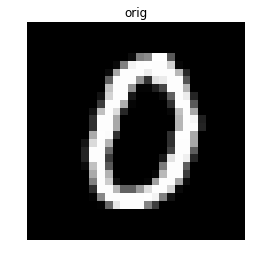

/media/rene/ADV/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


KeyboardInterrupt: 

In [13]:
att = fa.PointwiseAttack(fmodel)
metric = foolbox.distances.L0
criterion = foolbox.criteria.Misclassification()

b, l = u.get_batch(bs=1)  # returns random batch
plt.imshow(b[0, 0], cmap='gray')
plt.title('orig')
plt.axis('off')
plt.show()

# Estimate gradients from scores
if not model.has_grad:
    GE = foolbox.gradient_estimators.CoordinateWiseGradientEstimator(0.1)
    fmodel = foolbox.models.ModelWithEstimatedGradients(fmodel, GE)

# gernate Adversarial
a = foolbox.adversarial.Adversarial(fmodel, criterion, b[0], l[0], distance=metric)
att(a)   


print('pred', np.argmax(fmodel.predictions(a.image)))
if a.image is not None:   # attack was successful
    plt.imshow(a.image[0], cmap='gray')
    plt.title('adv')
    plt.axis('off')
    plt.show()